5050 HW 5  
Johan Boer  
u1106197

----

**Problem 1**  
**a)**  
Use Wiener's Fourier series defined on the interval $[0,1]$
$$ W(t) = X_0+\frac{\sqrt{2}}{\pi}\sum^{\infty}_{j=1}\frac{X_j}{j}\sin(\pi j t)$$

Plot of Wiener's Brownian Motion:


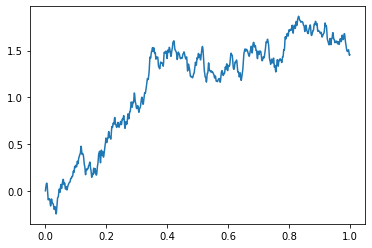

In [1]:
# Code for part a
import numpy as np
import matplotlib.pyplot as plt
import math

# Return vector of times and values
def wiener(N,segments):
    # Construct time vector
    t = []
    for i in range(segments+1):
        t.append(i/segments)
    
    # Generate Xi vector
    Xi = []
    for i in range(0,N+1):
        Xi.append(np.random.normal(0,1))
    
    # Generate values of the BM
    Wt = []
    for time in t:
        value = Xi[0]*time
        for j in range(len(Xi)-1):
            value += (math.sqrt(2)/math.pi)*Xi[j+1]/(j+1)*math.sin(math.pi*(j+1)*time)
        Wt.append(value)
    
    # Return an array with [time,values]
    return [t,Wt]
    
    
w = wiener(500,1000)
plt.plot(w[0],w[1])
print("Plot of Wiener's Brownian Motion:")
plt.show()

**b)**  
Use Donsker's theorem to simulate standard brownian motion on the time iterval $[0,1]$ using a random walk  
for the random walk   increments use the following distributions  
i) $ \pm1$ equally likely  
ii) Standard Normal  
iii) Uniform(0,1)  

Brownian Motion from +-1 equally likely:


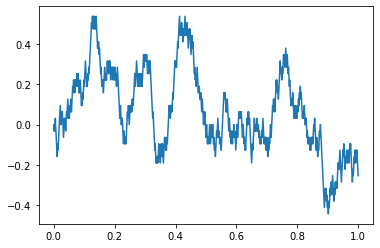

Brownian Motion from standard normal:


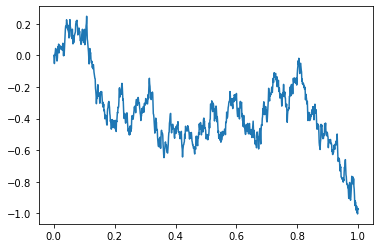

Brownian Motion from uniform(0,1):


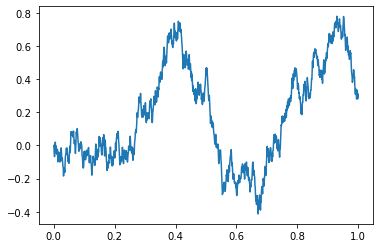

In [2]:
# Code for part b
def alternating_donsker(segments):
    # Construct time vector
    t = []
    for i in range(segments+1):
        t.append(i/segments)
    
    # Generate the random walk
    rw = [0]
    for i in range(segments):
        rw.append(2*np.random.binomial(1,.5)-1+rw[-1])
        
    # Scale the rw by 1 over the square root of N times the variance
    # Variance for this distribution is 1
    bmi = np.array(rw)
    bmi = bmi/(math.sqrt(segments*1))
    
    # Return an array with [time,values]
    return [t,bmi]


def normal_donsker(segments):
    # Construct time vector
    t = []
    for i in range(segments+1):
        t.append(i/segments)
    
    # Generate the random walk
    rw = [0]
    for i in range(segments):
        rw.append(np.random.normal(0,1)+rw[-1])
        
    # Scale the rw by 1 over the square root of N times the variance
    # Variance for this distribution is 1
    bmii = np.array(rw)
    bmii = bmii/(math.sqrt(segments*1))
    
    # Return an array with [time,values]
    return [t,bmii]


def uniform_donsker(segments):
    # Construct time vector
    t = []
    for i in range(segments+1):
        t.append(i/segments)
    
    # Generate the random walk
    rw = [0]
    for i in range(segments):
        rw.append(np.random.uniform(0,1)-.5+rw[-1])
        
    # Scale the rw by 1 over the square root of N times the variance
    # Variance for this distribution is 1/12
    bmiii = np.array(rw)
    bmiii = bmiii/(math.sqrt(segments*(1/12)))
    
    # Return an array with [time,values]
    return [t,bmiii]

    
i = alternating_donsker(1000)
plt.plot(i[0],i[1])
print("Brownian Motion from +-1 equally likely:")
plt.show()

ii = normal_donsker(1000)
plt.plot(ii[0],ii[1])
print("Brownian Motion from standard normal:")
plt.show()

iii = uniform_donsker(1000)
plt.plot(iii[0],iii[1])
print("Brownian Motion from uniform(0,1):")
plt.show()

**c)**  
The Brownian motion from $\pm 1$ equally likely looks the most different, especially with small values of n it looks much more spikey.  
As the value for n gets larger all three start to look the same.

**d)**  
$W(t)$ is distributed like a normal $(N(0,t))$ so the variance of $W(1/2) = 1/2$

In [3]:
# Code for d
A = []
I = []
II = []
III = []

for i in range(1000):
    A.append(wiener(25,500)[1][250])
    I.append(alternating_donsker(500)[1][250])
    II.append(normal_donsker(500)[1][250])
    III.append(uniform_donsker(500)[1][250])
    
print(f"Variance of Wiener Fourier series: {np.var(A)}")
print(f"Variance of Donsker's theorem using the distribution in b.i) : {np.var(I)}")
print(f"Variance of Donsker's theorem using the distribution in b.ii) : {np.var(II)}")
print(f"Variance of Donsker's theorem using the distribution in b.iii) : {np.var(III)}")
print("\nAll these variances are fairly close to the real value even with realatively small N's")

Variance of Wiener Fourier series: 0.4554080640555858
Variance of Donsker's theorem using the distribution in b.i) : 0.5156536879999999
Variance of Donsker's theorem using the distribution in b.ii) : 0.47428691819177937
Variance of Donsker's theorem using the distribution in b.iii) : 0.4717007443720468

All these variances are fairly close to the real value even with realatively small N's


**e)**  
Brownian Motion has the property that any time step is independent of its past, so the correlation is 0

In [4]:
# Code for e
W12 = []
W1_12 = []
for i in range(1000):
    brown = alternating_donsker(500)
    W12.append(brown[1][250])
    W1_12.append(brown[1][500]-brown[1][250])
print(f"The correlation coefficient between W(1/2) and W(1)-W(1/2) is: {np.corrcoef(W12,W1_12)[0][1]}")
print("\nThe correlation is very close to zero.")

The correlation coefficient between W(1/2) and W(1)-W(1/2) is: 0.03719897494740297

The correlation is very close to zero.


**f)**
The probability that the maximum value of the Brownian motion is above 3 is given by:  
$ 2P(B(1)>3) = 2P(N(0,1)>3) = 2(.001349898) = .0026998$

In [5]:
max_values = []
count = 0
for i in range(1000):
    motion = normal_donsker(500)
    m = np.amax(motion[1])
    max_values.append(m)
    if m > 3:
        count += 1
test_prob = count/1000
print(f"An estimate of the probability that the maximum is above 3 is:{test_prob}")
print("\nThe estimate is usually very close to the theoretical value")

An estimate of the probability that the maximum is above 3 is:0.003

The estimate is usually very close to the theoretical value


**Problem 2**
Let $W(t)$ be standard Brownian motion.  


a)  $P(W(t)=0 \text{ for some t with } 2 < t <3)$


let $X(t) = W(2t)$ X is a brownian motion as shown on a previous homework, and  $P(W(t)=0 \text{ for some t with } 2 < t <3)$  
becomes  $P(X(s)=0 \text{ for some s with } 1 < s <3/2)$. Then we can use the formula for this and we get the probability  
$1-\frac{2}{\pi}\arctan(\frac{1}{\sqrt{1/2}}) \approx .3918 $


b)  $P(W(t)<4 \text{  for all t with } 0 < t < 3)$


This asks what the probability is that a standard Brownian motion between 0 and 3 has maximum value smaller than 4,  
The probability of a Brownian motion having maximum value of 4 or higher is given by:  
$2P(W(3)>4) = 2P(N(0,3)>4)$ So, the probability of b) is   
$1-2P(N(0,3)>4) \approx 1 - .1824 \approx .81758 $


c)  $P(W(t)>0 \text{ for all } t>10)$


Brownian motion will cross any arbitrary point if it continues long enough,  
This question asks what the probability is that a standard brownian motion will stay positive after time 10,  
But the Brownian motion will eventually become negative so the probability of c) is 0.